In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx


def form_pwl_quad(N):
    
    eps = 2**(-N)
    
    x = cvx.Variable(N+1)
    y = cvx.Variable(N+1)

    cst = [
        0 <= x[0],
        x[0] <= eps,
        y[0] >= x[0]*eps,
    ]
    
    for i in range(N):
        delta = eps*(2**i)
        
        cst += [
            x[i] >= cvx.abs(x[i+1] - delta),
            y[i] <= y[i+1] - 2*delta*x[i+1] + delta**2,
        ]        

    return cst, x[-1], y[-1]

In [2]:
# def foo(xys, delta):
#     for x0,y0 in xys:
#         for s in [-1, +1]:
#             x1 = s*x0 + delta
#             y1 = y0 + 2*delta*x1 - delta**2
            
#             yield (x1, y1)   

# epsilon = .1

# xys = [(0, 0), (epsilon, epsilon**2)]

# for i in range(3):
#     xys = foo(xys, epsilon)
#     epsilon *= 2
    
    
# x, y = zip(*sorted(xys))
# plt.plot(x,y, '-o')

# x = np.linspace(0, max(x))
# plt.plot(x,x**2, alpha=.3)

In [3]:
# def foo(xyzs, delta):
#     for x0,y0,z0 in xyzs:
#         for s in [-1, +1]:
#             x1 = s*x0 + delta
#             y1 = y0 + 2*delta*x1 - delta**2
#             z1 = z0 + 3*delta*y1 - 2*delta*x1 + delta**3
            
#             yield (x1, y1, z1)   

# epsilon = .1

# xyzs = [(0, 0, 0), (epsilon, epsilon**2, epsilon**3)]

# for i in range(1):
#     xyzs = foo(xyzs, epsilon)
#     epsilon *= 2
    
# x, y, z = zip(*sorted(xyzs))
# plt.plot(x,z, '-o')

# x = np.linspace(0, max(x))
# plt.plot(x,x**3, alpha=.3)

In [4]:
x = np.linspace(0, 1, 10)

In [29]:
N = 13

def make_approx(N):
    cst, x, y = form_pwl_quad(N)

    def foo(a):
        prob = cvx.Problem(
            cvx.Maximize(x),
            cst + [y <= a]
        )

        prob.solve()

        return x.value
    
    return foo

In [30]:
foo = make_approx(4)

In [34]:
np.sqrt(.2)

0.4472135954999579

In [33]:
foo(.2)

0.44666666668027066

Let $x = (x_0, \ldots, x_N) \in \mathbf{R}^{N+1}$ and $y = (y_0, \ldots, y_N) \in \mathbf{R}^{N+1}$.

Let $\epsilon = \frac{1}{2^N}$ and $\delta_i = 2^i \epsilon$.
Start with the constraints

$$
\begin{align*}
0 \leq x_0 \leq \delta_0 \\
\delta_0 x_0 \leq y_0 \\
\end{align*}
$$

Then, for $i = 0, \ldots, N-1$, add the constraints

$$
\begin{align*}
x_i \geq \left| x_{i+1} - \delta_i \right|  \\
y_i \leq y_{i+1} - 2\delta_i x_{i+1} - \delta_i^2 \\
\end{align*}
$$

The PWL approx to $x^2 \leq y$ is given by $(x_N, y_N)$ over the range $0 \leq x_N \leq \delta_N = 1$.

# Example with $N = 0$

We have $\epsilon = \delta_0 = 1$, so our constraints are

$$
\begin{align*}
0 \leq x_0 \leq 1 \\
x_0 \leq y_0 \\
\end{align*}
$$


# Example with $N = 1$

We have $\epsilon = \delta_0 = \frac{1}{2}$, so our constraints are

$$
\begin{align*}
0 \leq x_0 \leq \frac{1}{2} \\
\frac{1}{2} x_0 \leq y_0 \\
x_0 \geq \left| x_1 - \frac{1}{2} \right|  \\
y_0 \leq y_1 - x_1 - \frac{1}{4} \\
\end{align*}
$$

and our PWL approx is given by $(x_1, y_1)$ over the range $0 \leq x_1 \leq \delta_1 = 1$

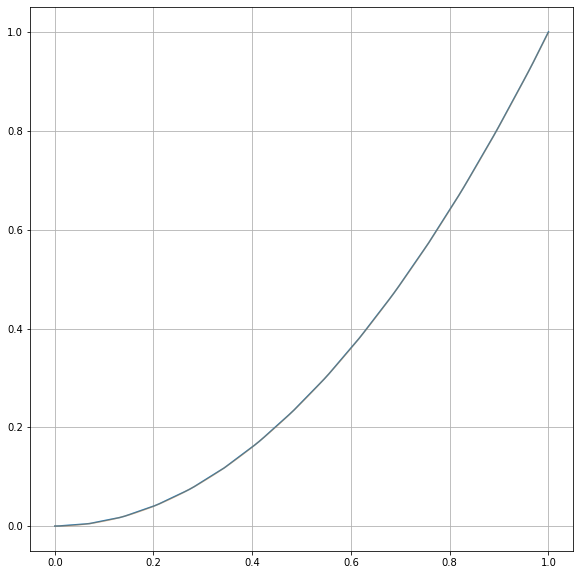

In [42]:
x = np.linspace(0, 1, 100)
y = [foo(a) for a in x]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y)
ax.set_aspect('equal')
ax.grid()
x = np.linspace(0,1,1000)
ax.plot(x,x**2, alpha=.3)

fig.savefig('test.png', dpi=200)

In [ ]:


x + alpha*x - alpha*x^2

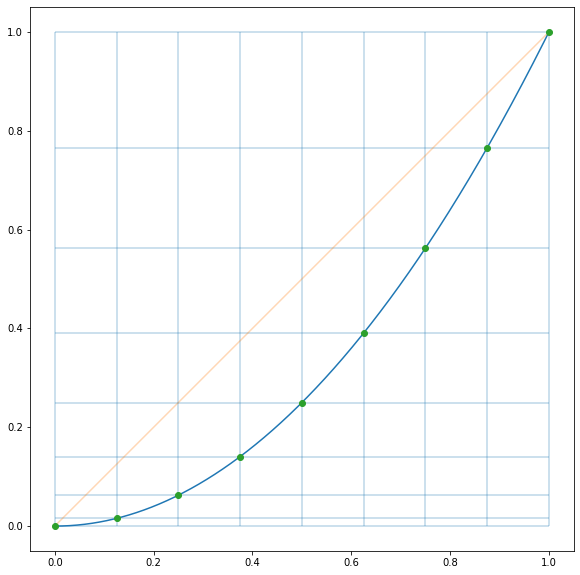

In [35]:
N = 3

alpha = .5

x = np.linspace(0,1,1000)
# y = x + alpha*x*(1-x)
# y = x-x**2
y = x**2

fig, ax = plt.subplots(figsize=(10,10))
# ax.plot(y,x)
ax.plot(x,y)
ax.plot(x,x, alpha=.3)
ax.set_aspect('equal')

x = np.arange(0,1 + 2**(-N), 2**(-N))
ax.vlines(x, 0, 1, alpha=.3)
ax.hlines(x**2, 0, 1, alpha=.3)
ax.plot(x, x**2, 'o')


# ax.grid()